#**GRIP MAY21 Batch**
#**THE SPARKS FOUNDATION**
#**Field-Data Science & Business Analytics**
#**Task 3- Exploratory Data Analysis- Retail**
#**To Do- To find out the weak areas where you can work to make more profit**
# **Done By- Shiv Raj Singh**

# **Importing libraries**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Importing DataSet**

In [30]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [31]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Handling the Missing Data**

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Removing Duplicate Records**

In [9]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [10]:
df.drop_duplicates(inplace = True)
dup = df.duplicated()
dup.sum()

0

# **Handling Outliers**

<AxesSubplot:>

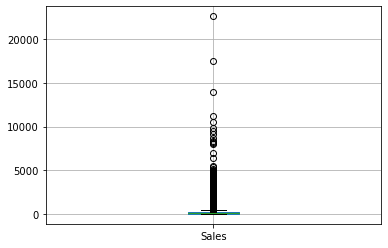

In [11]:
df.boxplot(column=['Sales'])


# **Removing Outliers**

In [12]:
def remove_outlier(col):
  sorted(col)
  q1,q3 = col.quantile([0.25,0.75])
  IQR = q3-q1
  lower_range = q1-(1.5*IQR)
  upper_range = q3+(1.5*IQR)
  return lower_range,upper_range

In [13]:
lowsales,upsales = remove_outlier(df['Sales'])
df['Sales'] = np.where(df['Sales']>upsales,upsales,df['Sales'])
df['Sales'] = np.where(df['Sales']<lowsales,lowsales,df['Sales'])

<AxesSubplot:>

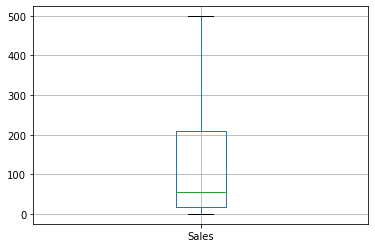

In [14]:
df.boxplot(column=['Sales'])

<AxesSubplot:>

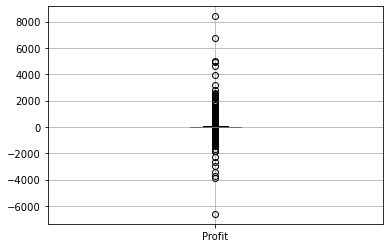

In [15]:
df.boxplot(column=['Profit'])

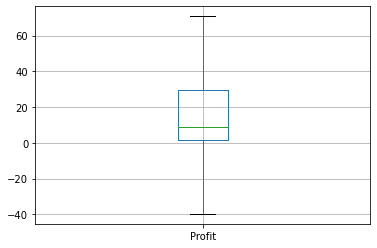

In [16]:
lowprofit,highprofit = remove_outlier(df['Profit'])
df['Profit'] = np.where(df['Profit']>highprofit,highprofit,df['Profit'])
df['Profit'] = np.where(df['Profit']<lowprofit,lowprofit,df['Profit'])
df.boxplot(column=['Profit'])
plt.show()

<AxesSubplot:>

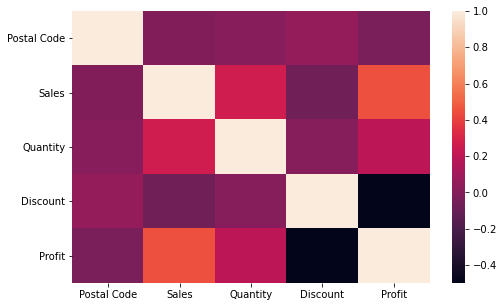

In [17]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
sns.heatmap(df.corr())


<ipython-input-18-1d3795a4d413>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

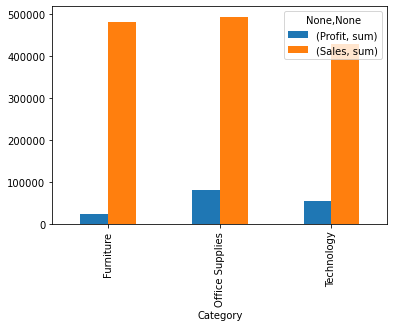

In [18]:
plt.figure(figsize=(10,10))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

<ipython-input-19-6450fd270add>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

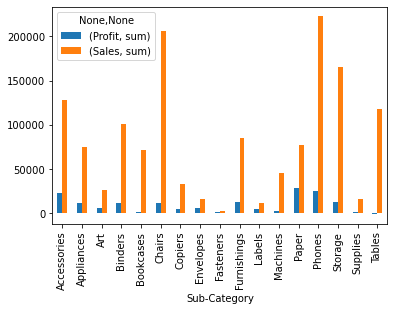

In [19]:
plt.figure(figsize=(10,10))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

<Figure size 1728x720 with 0 Axes>

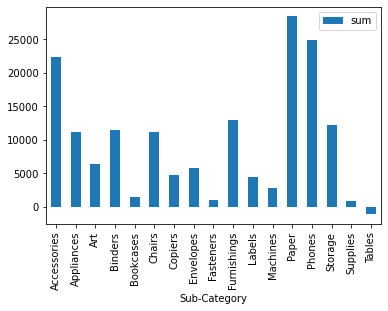

In [20]:
plt.figure(figsize=(24,10))
df.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

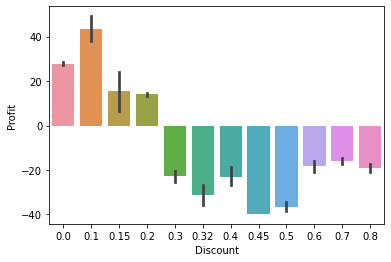

In [21]:
sns.barplot(x = df.Discount,y = df.Profit)
plt.show()

<ipython-input-22-1fc4a0f2d721>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataplot = df.groupby(['State'])['Sales','Profit'].sum()


<AxesSubplot:xlabel='State'>

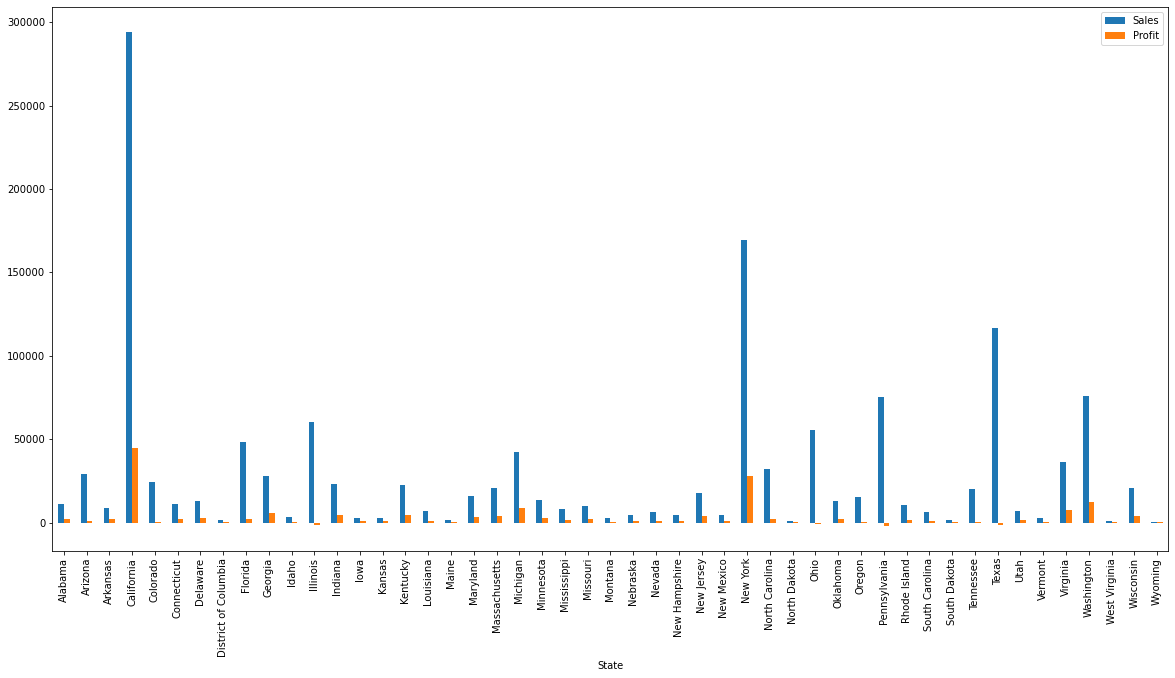

In [22]:
dataplot = df.groupby(['State'])['Sales','Profit'].sum()
dataplot.plot.bar(figsize=(20,10))

In [23]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [24]:
(df['Ship Mode'].value_counts()/len(df['Ship Mode']))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

<AxesSubplot:>

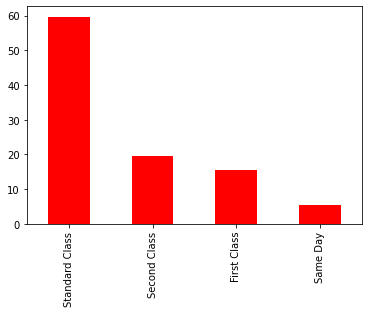

In [25]:
((df['Ship Mode'].value_counts()/len(df['Ship Mode']))*100).plot(kind = 'bar',color = 'red')

In [26]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [27]:
(df['Category'].value_counts()/len(df['Category']))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:>

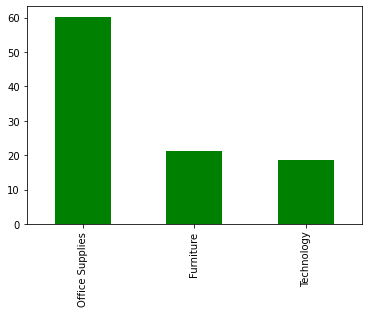

In [28]:
((df['Category'].value_counts()/len(df['Category']))*100).plot(kind = 'bar',color = 'green')